# Heart Disease prediction

## Overview
### The main aim of this project is to predict that  if  a patient has heart disease or not based on various given features.

### About Dataset
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Content

Attribute Information: 
Columns descriptions as follows

   1. age : age in years
   2. sex : (1 = male; 0 = female)
   3. cp: chest pain type (4 values)
   4. trestbps: resting blood pressure : resting blood pressure (in mm Hg on admission to the hospital)
   5. chol: serum cholestoral in mg/dl
   6. fbs: fasting blood sugar > 120 mg/dl : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   7. restecg:  resting electrocardiographic results (values 0,1,2) : resting electrocardiographic results
   8. thalach: maximum heart rate achieved
   9. exang : exercise induced angina (1 = yes; 0 = no)
   10. oldpeak: ST depression induced by exercise relative to rest
   11. slope: the slope of the peak exercise ST segment
   12. ca: number of major vessels (0-3) colored by flourosopy
   13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
   14. target : 1 or 0, 0 = no disease and 1 = disease.

The data was downloaded from kaggle.  data link  https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

#### Step Followed
1. Data Analysis and visualization
2. Feature Engineering
    - Data Cleaning
    - Checking for missing values
    - Removing outlers
3. Feature Selection
    - Checking for correlation and multicollinearity
4. Model Building
5. Model score evaluation 

In [1]:
### importing all important libraries 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
### reading dataset 

In [5]:
FileName= 'F:\ML Projects\Heart\heart.csv'
df=pd.read_csv(FileName)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data analysis 

In [7]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### checking for missing values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset has no missing values

####  seperating descrete and contineous features from the datset for further analysis 

In [10]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


In [11]:
discrete_feature

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

records for male is more than female records.

In [13]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

  Dataset is balanced

<AxesSubplot:xlabel='target', ylabel='count'>

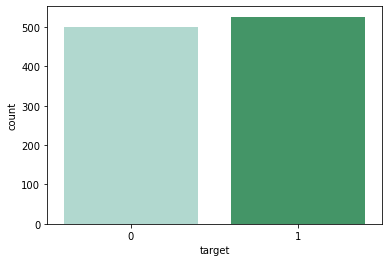

In [14]:
sns.countplot(x='target',palette='BuGn', data=df)

#### Let's analyse the relationship of the features with target variable

<AxesSubplot:xlabel='sex', ylabel='age'>

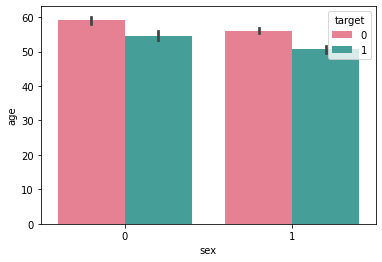

In [15]:
sns.barplot(data=df, x='sex', y='age',  hue='target', palette='husl')

### Sex 1 represents male and 0 represents female. This barplot shows that female are getting heart diseases at later ages(over age 50) compared to male(below age 50).

<AxesSubplot:xlabel='sex', ylabel='chol'>

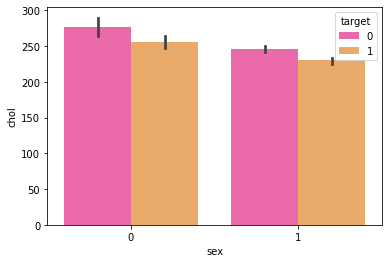

In [16]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

#### This barplot shows that cholestoralis higher in female than male. Also for given records hear disease is more in female than male cases. Therefore, cholestoral level has relation with heart disease.

<AxesSubplot:xlabel='sex', ylabel='count'>

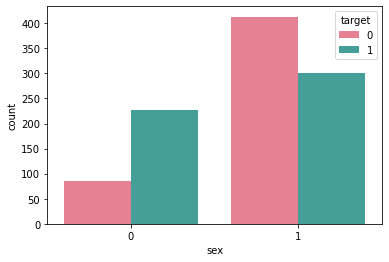

In [17]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

####   From this barplot we can see that for the given number of male and female records, female has more heart disease than Male. 

<AxesSubplot:xlabel='ca', ylabel='count'>

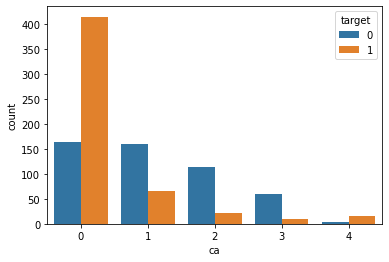

In [18]:
# ca: number of major vessels (0-3) colored by flourosopy

sns.countplot(x='ca',hue='target',data=df)

#### This count plot shows that as the ca values increasing, the recodrs with target value 1 is decreaseing. Therefore,  they are negtively correlatated. 

#### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

<AxesSubplot:xlabel='thal', ylabel='count'>

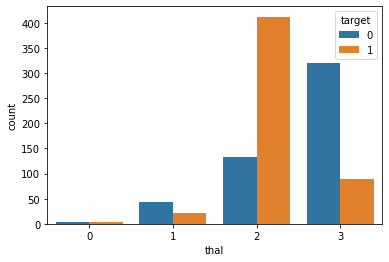

In [19]:
sns.countplot(x='thal',data=df, hue='target')

#### thal value 2 i.e, reversable defect have maximum caases of heart disease.

<AxesSubplot:xlabel='thal', ylabel='count'>

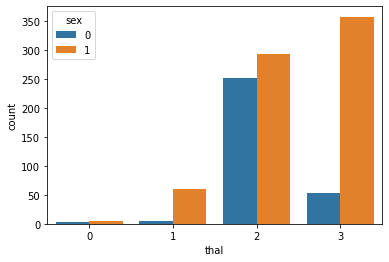

In [20]:
sns.countplot(x='thal', hue='sex',data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

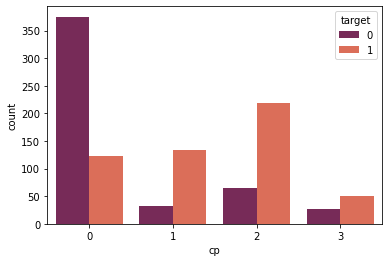

In [21]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

#### Patient with  type 2 chest pain have maximum number of heart diseases and with chest pain type 3 have minimum number of heart diseases. Also Patient with no  chest pain have maximum number of records with no hear diseases. Therefore, The feature cp has direct relationship with the target  heart disease.

<AxesSubplot:xlabel='cp', ylabel='count'>

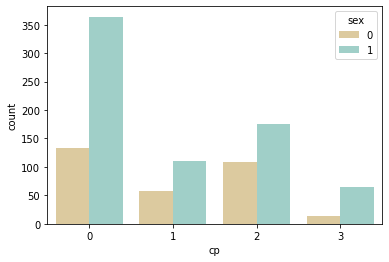

In [22]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

### Continuous features

In [23]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [24]:
continuous_feature

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [25]:
import warnings
warnings.filterwarnings('ignore')

#### Distribution of features

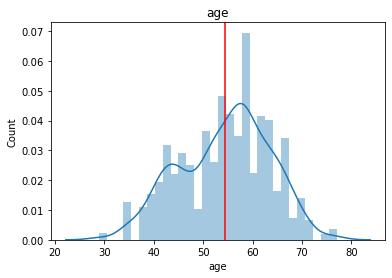

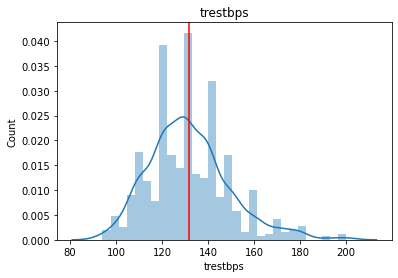

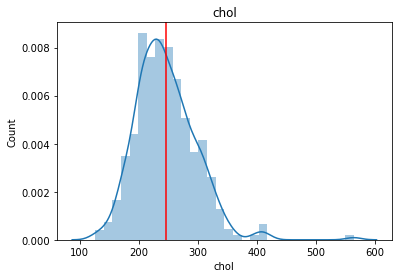

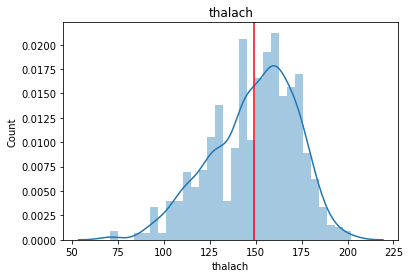

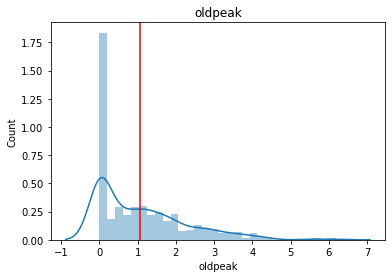

In [26]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(data[feature], bins=30)
    plt.axvline(data[feature].mean(), color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [27]:
 ## Checking skewness
df[continuous_feature].skew()

age        -0.248866
trestbps    0.739768
chol        1.074073
thalach    -0.513777
oldpeak     1.210899
dtype: float64

#### The features are not normally distributed

### Detecting outliers using Boxplot

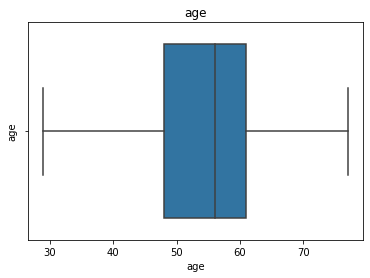

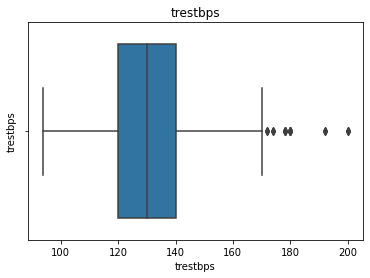

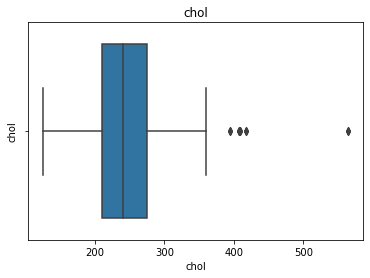

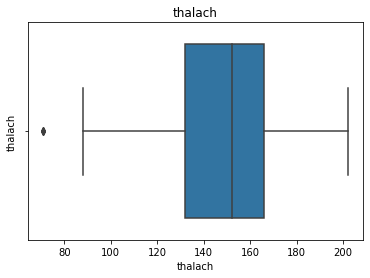

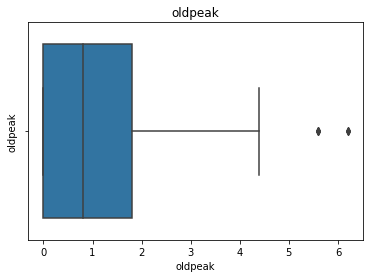

In [28]:
for feature in continuous_feature:
    data=df.copy()
    
    sns.boxplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [29]:
### percentage of outliers in each feature
def IQR_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    IQR_lower_limit=(Q1-1.5*IQR)
    IQR_upper_limit=(Q3+1.5*IQR)
    outliers=((data < IQR_lower_limit) | (data > IQR_upper_limit)).sum()*100/data.shape[0]
    print(outliers)
    

In [30]:
IQR_outliers(df[continuous_feature])

age         0.000000
trestbps    2.926829
chol        1.560976
thalach     0.390244
oldpeak     0.682927
dtype: float64


####  Features trestbps(maximum outliers) ,chol, thalach, and oldpeak contain outliers and I will remove then in feature engineering part.

## Feature engineering 

### Cleaning Outliers

In [31]:
data_cleaned=pd.DataFrame()

{'whiskers': [<matplotlib.lines.Line2D at 0x160817ccdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x160817d9520>,
 'boxes': [<matplotlib.lines.Line2D at 0x160817cca30>],
 'medians': [<matplotlib.lines.Line2D at 0x160817d9c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x160817d9fd0>],
 'means': []}

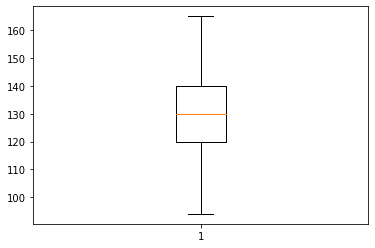

In [32]:
q3=df["trestbps"].quantile(q=0.75)
q1=df["trestbps"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data_cleaned=df[df["trestbps"]<IQR_upper_limit]
plt.boxplot(data_cleaned["trestbps"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1608183da00>,
 'caps': [<matplotlib.lines.Line2D at 0x1608184c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1608183d640>],
 'medians': [<matplotlib.lines.Line2D at 0x1608184c880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1608184cc10>],
 'means': []}

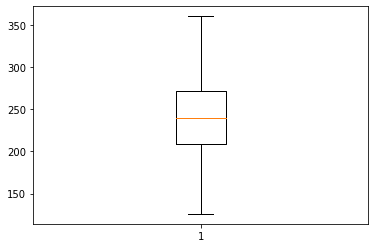

In [33]:
q3=df["chol"].quantile(q=0.75)
q1=df["chol"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data_cleaned=data_cleaned[data_cleaned["chol"]<IQR_upper_limit]
plt.boxplot(data_cleaned["chol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x160818ae0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x160818ae7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1608189dd00>],
 'medians': [<matplotlib.lines.Line2D at 0x160818aef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x160818b82e0>],
 'means': []}

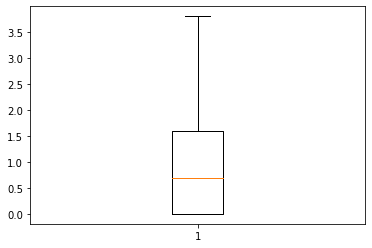

In [34]:
q3=df["oldpeak"].quantile(q=0.75)
q1=df["oldpeak"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data_cleaned=data_cleaned[data_cleaned["oldpeak"]<IQR_upper_limit]
plt.boxplot(data_cleaned["oldpeak"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16081912850>,
 'caps': [<matplotlib.lines.Line2D at 0x16081912f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x160819124c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1608191e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1608191ea60>],
 'means': []}

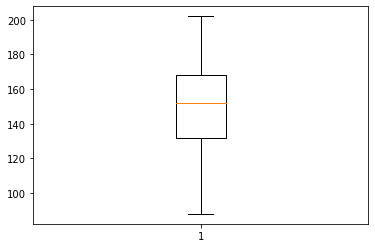

In [35]:
q3=df["thalach"].quantile(q=0.75)
q1=df["thalach"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
data_cleaned=data_cleaned[data_cleaned["thalach"]>IQR_lower_limit]
plt.boxplot(data_cleaned["thalach"])

#### Oultliers are removed from each features, let's plot boxplot again to recheck for any outliers

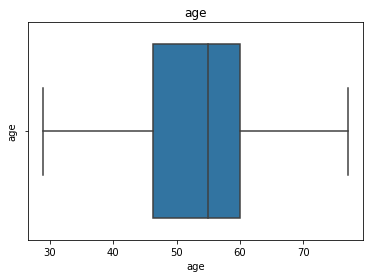

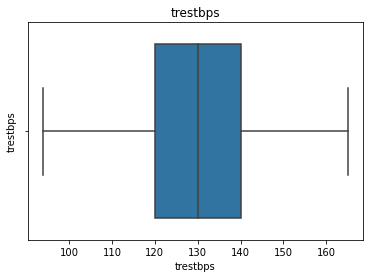

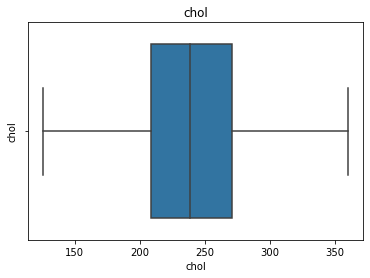

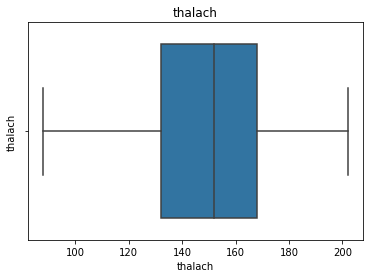

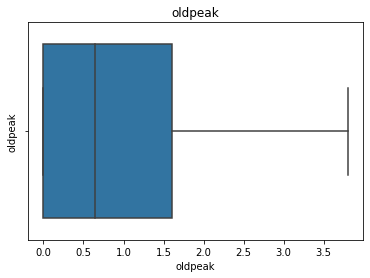

In [36]:
for feature in continuous_feature:
    
    sns.boxplot(data_cleaned[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

The dataset is now cleaned after removing all outliers.

### Ploting pairplot (scatterplot) to analyse the relationship of features with target variables.

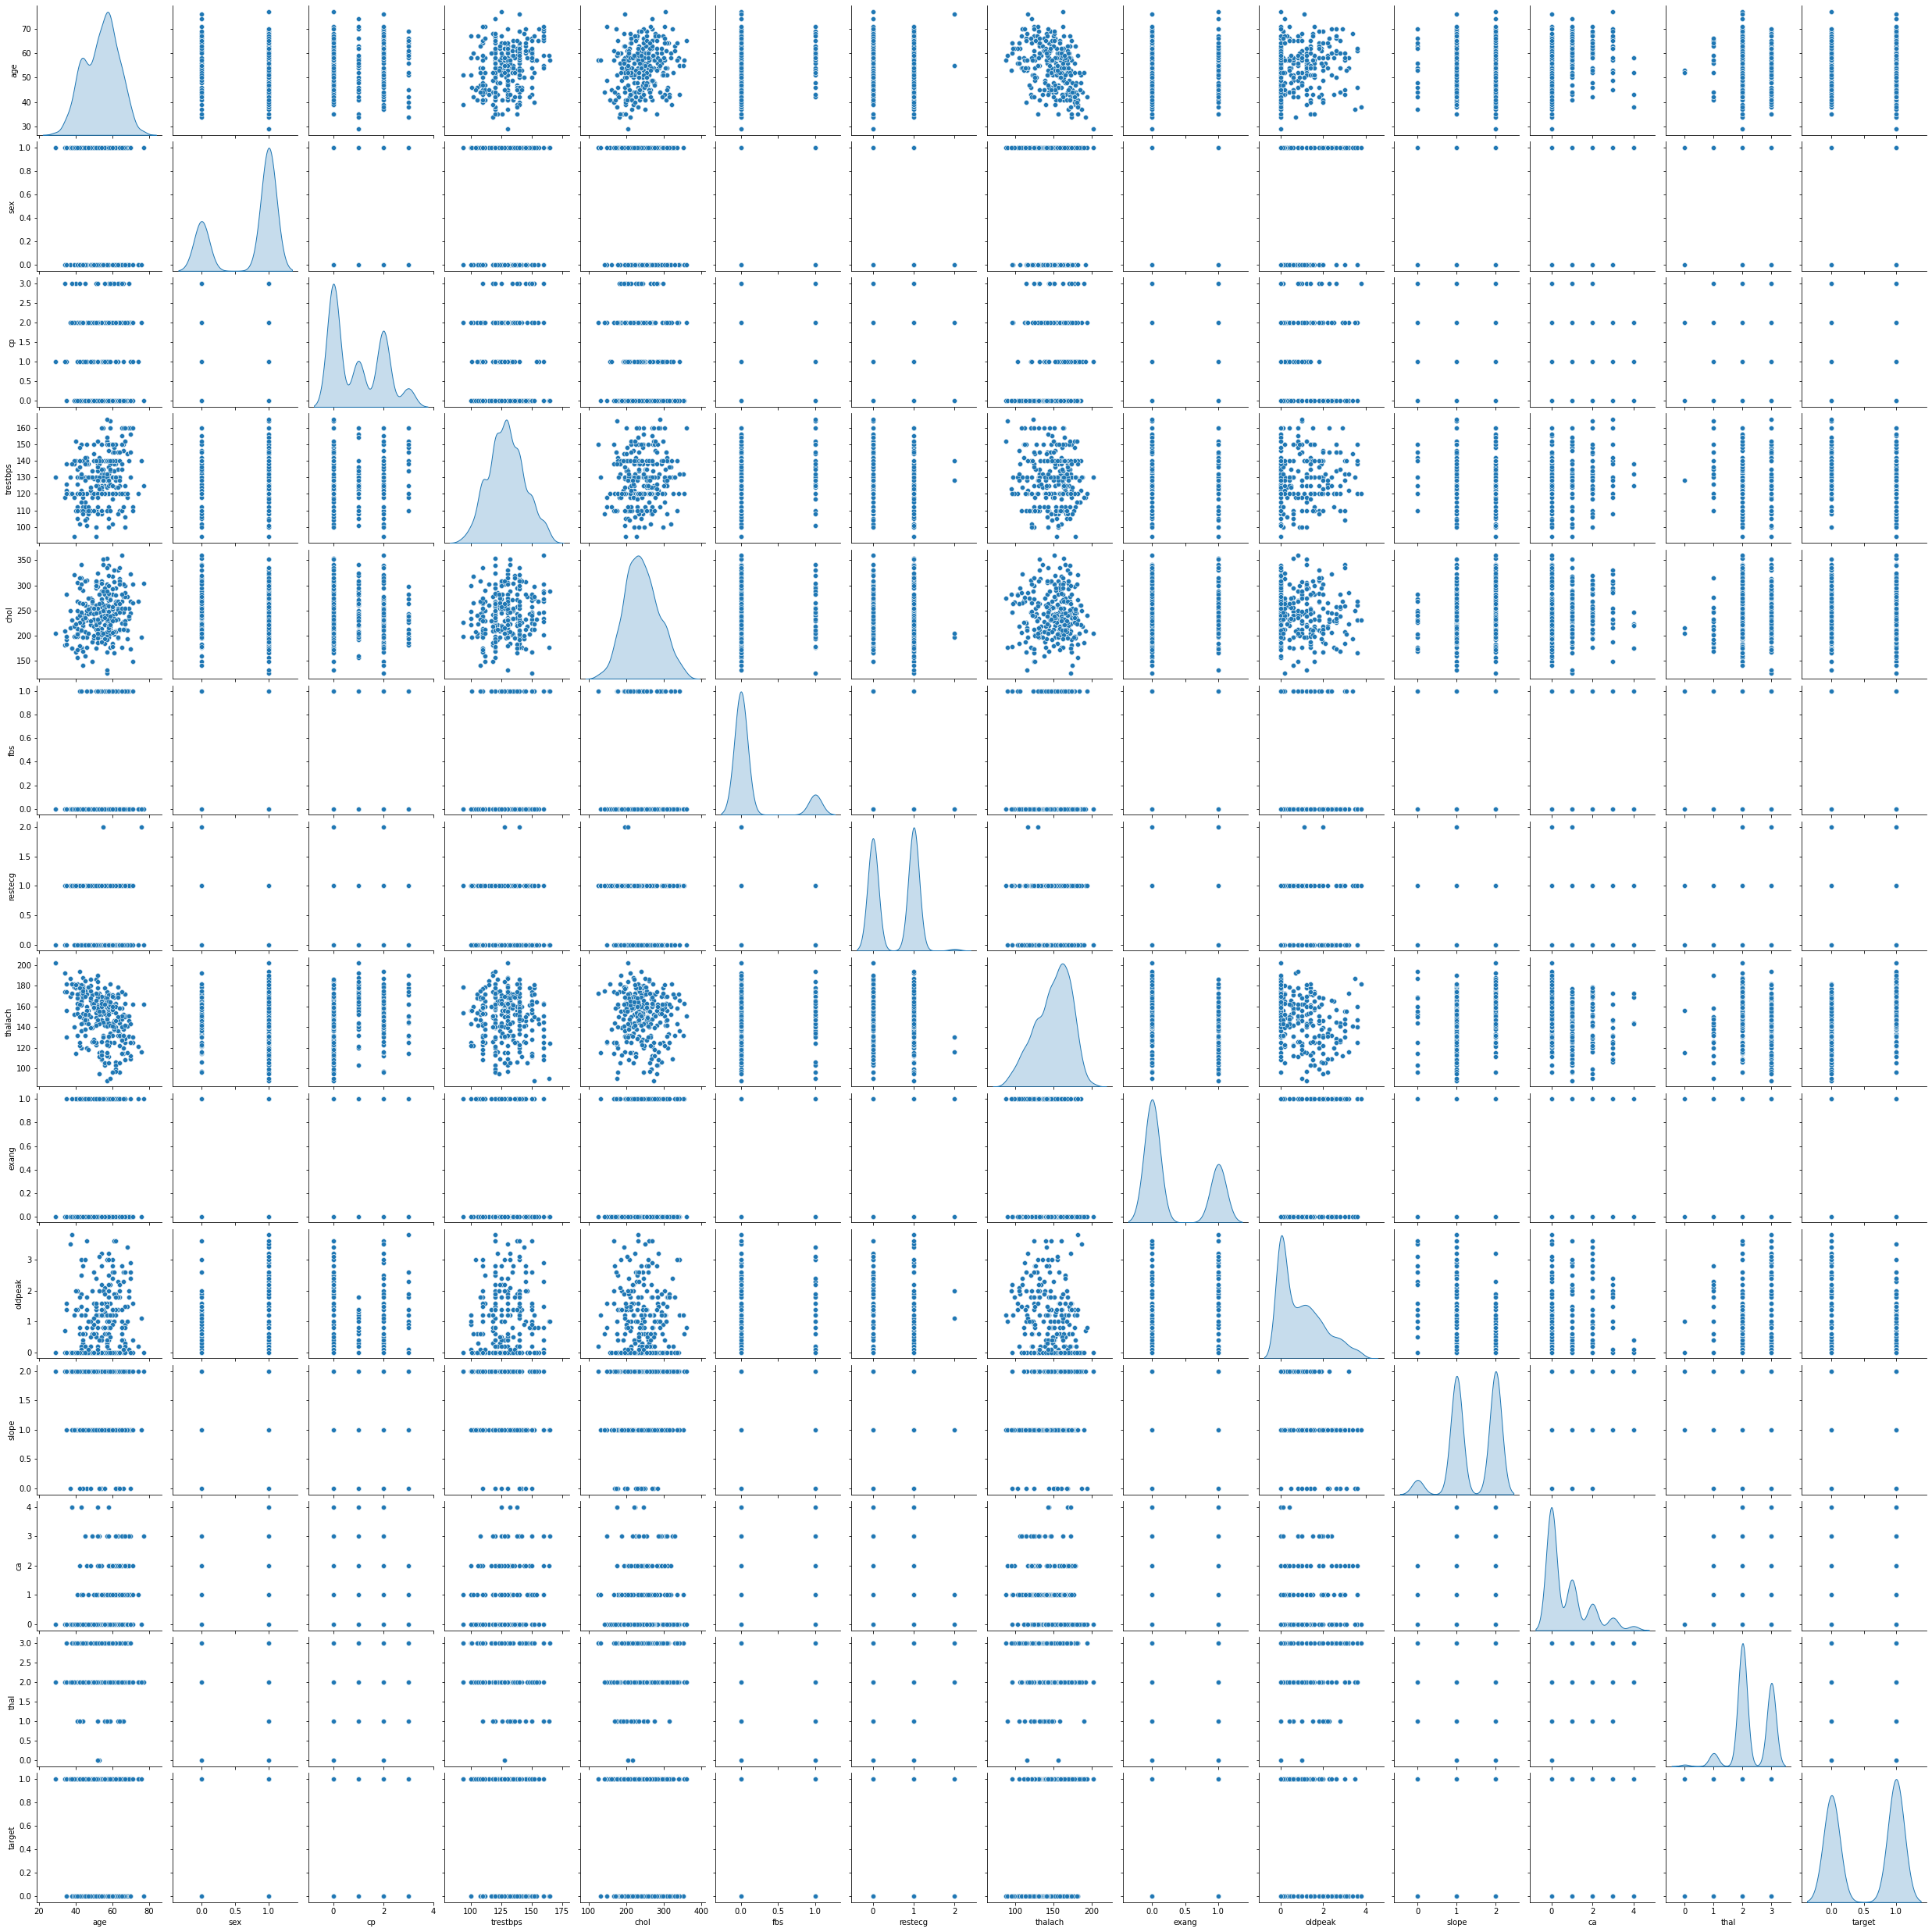

In [37]:
sns.pairplot(data_cleaned, diag_kind='kde')

### Checking for Correlation

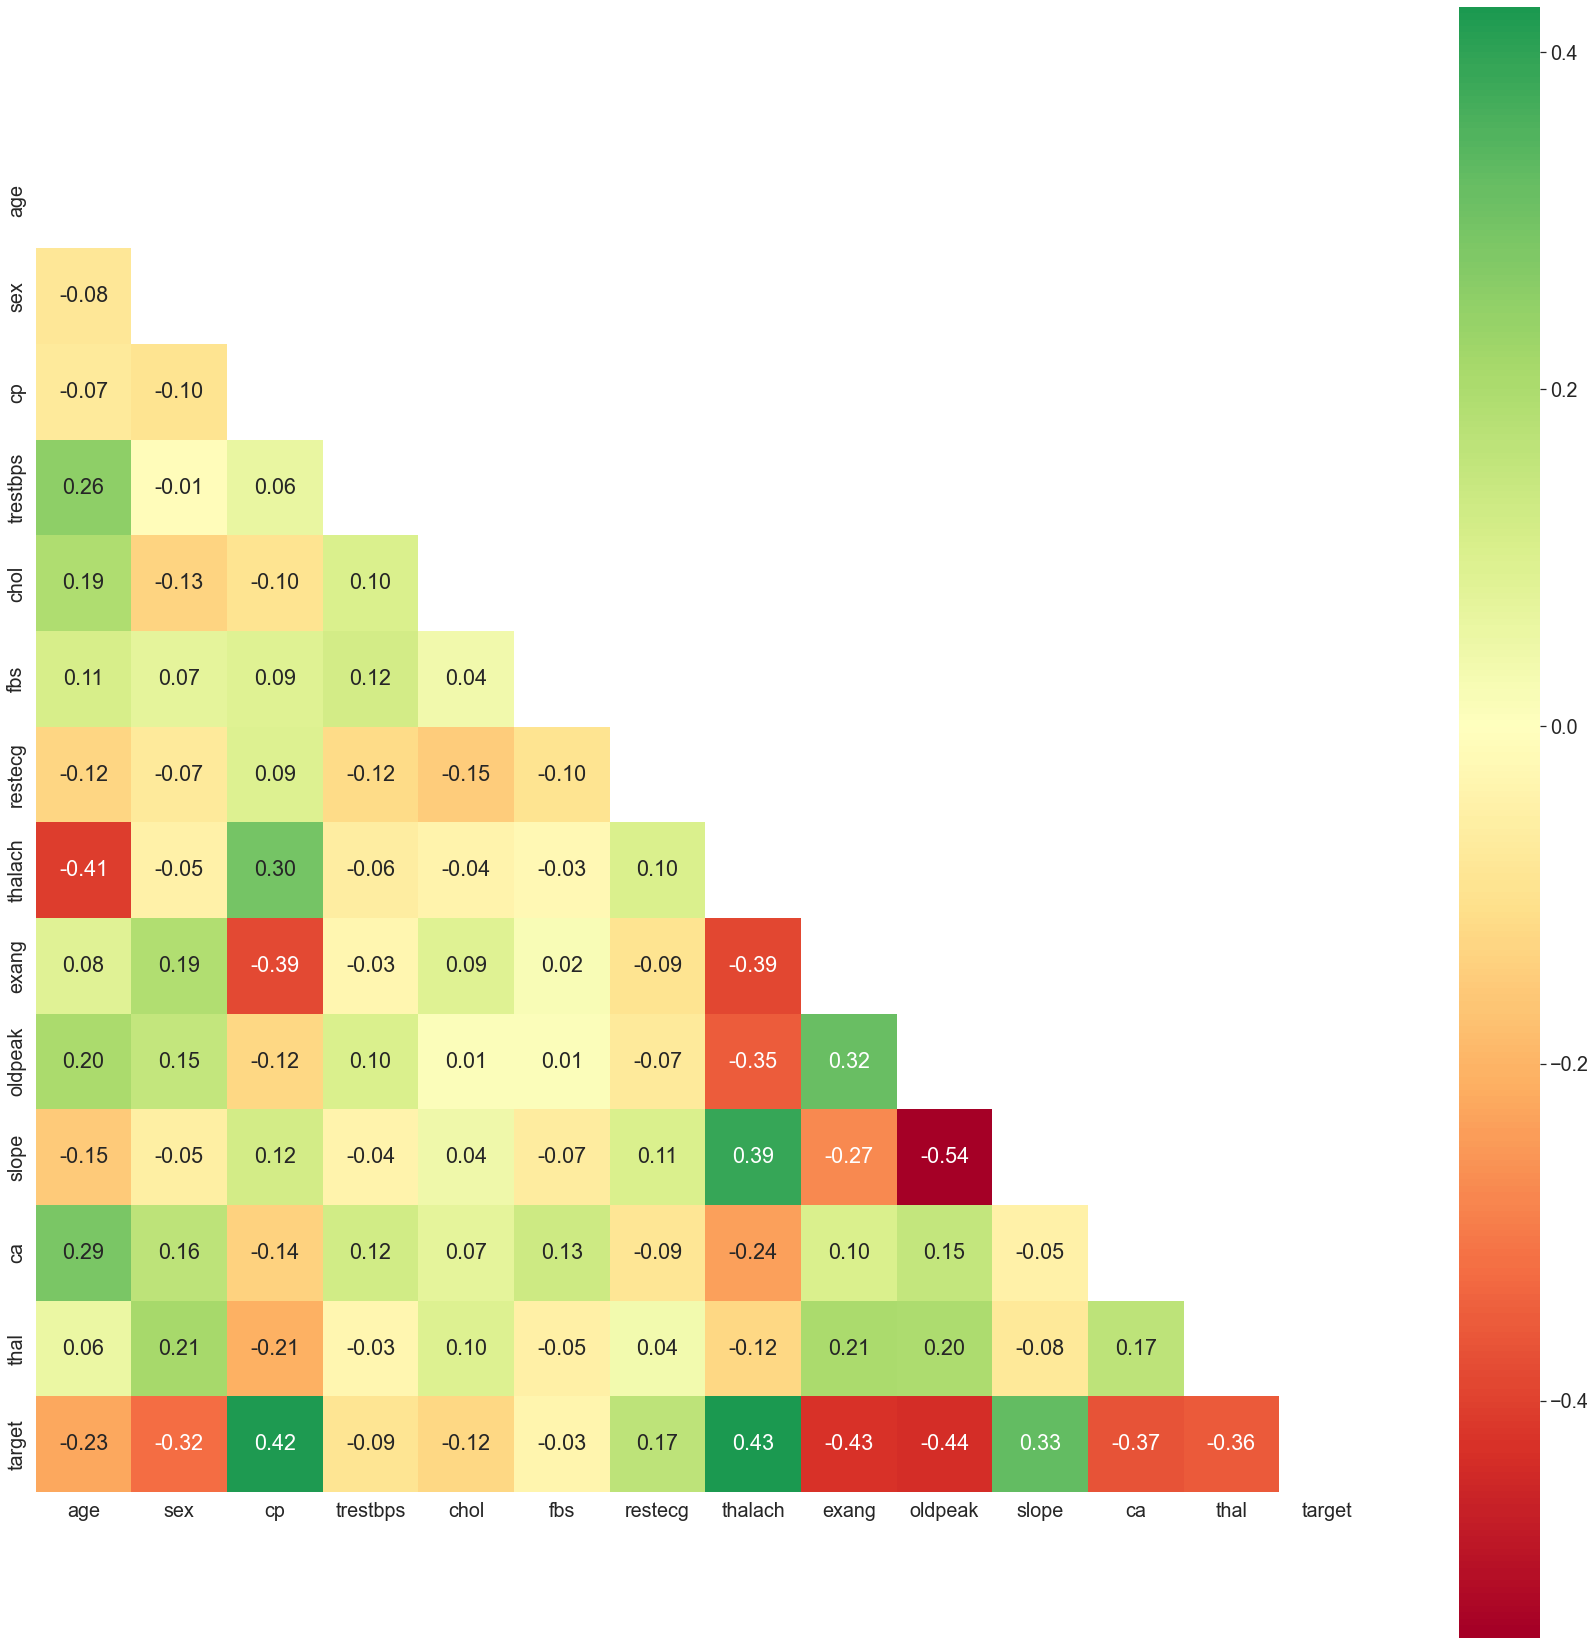

In [38]:
cormatrix = data_cleaned.corr()
# Create a mask
mask = np.triu(np.ones_like(cormatrix, dtype=bool))

plt.figure(figsize=(30, 30),facecolor='white')
sns.set(style="white", font_scale=1.8)
sns.heatmap(cormatrix, mask=mask, center=0, annot=True,
              fmt='.2f', square=True, cmap="RdYlGn")

plt.show();

#### The are some correlation present but not strong enough to to delete, we will check for Multicollinearity. 

### Scaling the dataset using StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data_cleaned[columns_to_scale] = StandardScaler.fit_transform(data_cleaned[columns_to_scale])

In [40]:
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.210426,1,0,-0.290753,-0.664118,0,1,0.803573,0,0.046685,2,2,3,0
1,-0.101573,1,0,0.736589,-0.864245,1,0,0.235871,1,2.122016,0,0,3,0
2,1.748925,1,0,1.079036,-1.509101,0,1,-1.074213,1,1.627890,0,0,3,0
3,0.769250,1,0,1.284505,-0.864245,0,1,0.497887,0,-0.941568,2,1,3,0
4,0.878103,0,0,0.599610,1.159267,1,1,-1.903932,0,0.936113,1,3,2,0


#### Seperating dependent and independent features

In [41]:
x=data_cleaned.drop(columns=["target"])

In [42]:
y=data_cleaned["target"]

#### Checking Multicollinearity by calculating variance inflation factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_info['Column'] = x.columns
vif_info.sort_values('VIF', ascending=False)


,VIF,Column
12,9.586709,thal
10,7.671918,slope
1,4.012780,sex
6,2.218002,restecg
2,2.149632,cp
8,2.067571,exang
11,1.823880,ca
7,1.615930,thalach
9,1.579975,oldpeak
0,1.420975,age


#### VIF is less than 10 for all features, therefore no collinearity exists and we do not need to delete any feature and all features have importance in predicting the target features. .

### Now the dataset is ready to use in  ML models.

#### splitting the dataset into training and test data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=40)

## Model Building and evaluation

In [46]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_pred, m):
    sns.set(style="white", font_scale=1.5)
    cm = confusion_matrix(y_test,y_pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['No ','Yes']
    plt.title(f'Confusion Matrix - {m}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [47]:
# Created a common function to plot roc curve
def Plot_roc_curve(y_pred, m):
    auc_m = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_m)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {m}')
    plt.legend()
    plt.show()

In [48]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score,roc_curve

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

### Bernoulli Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()

### K Nearest Neighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [53]:
models= [lr_model, rfc,  NB , KNN]

In [54]:
## Creating a dataFrame to evaluate model scores
Columns= ['Model', 'accuracy score', 'Precision', 'Recall', 'f1_score', 'AUC']
evaluation_df=pd.DataFrame(columns=Columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score,AUC


### Prediction and model evaluation 

model: LogisticRegression() 

accuracy score 0.8515901060070671
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       123
           1       0.86      0.88      0.87       160

    accuracy                           0.85       283
   macro avg       0.85      0.85      0.85       283
weighted avg       0.85      0.85      0.85       283

AUC 0.8471290650406504


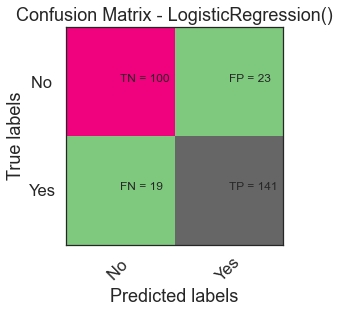

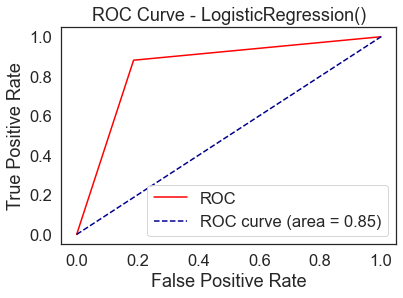


 **************************************************************** 


 **************************************************************** 

model: RandomForestClassifier() 

accuracy score 0.9893992932862191
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       123
           1       0.98      1.00      0.99       160

    accuracy                           0.99       283
   macro avg       0.99      0.99      0.99       283
weighted avg       0.99      0.99      0.99       283

AUC 0.9878048780487805


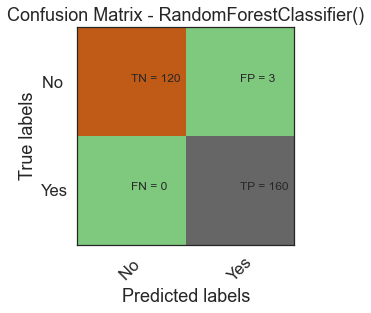

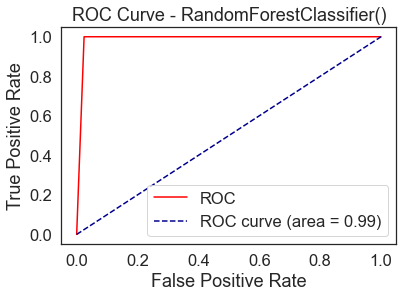


 **************************************************************** 


 **************************************************************** 

model: BernoulliNB() 

accuracy score 0.8374558303886925
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       123
           1       0.86      0.85      0.86       160

    accuracy                           0.84       283
   macro avg       0.83      0.84      0.83       283
weighted avg       0.84      0.84      0.84       283

AUC 0.835569105691057


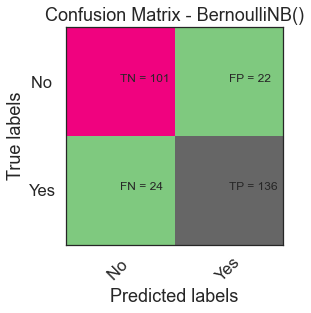

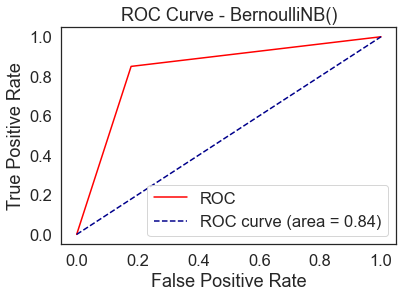


 **************************************************************** 


 **************************************************************** 

model: KNeighborsClassifier() 

accuracy score 0.8162544169611308
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.85      0.82      0.84       160

    accuracy                           0.82       283
   macro avg       0.81      0.81      0.81       283
weighted avg       0.82      0.82      0.82       283

AUC 0.8149390243902439


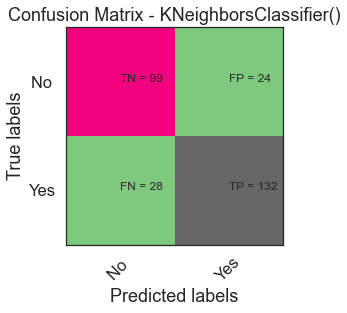

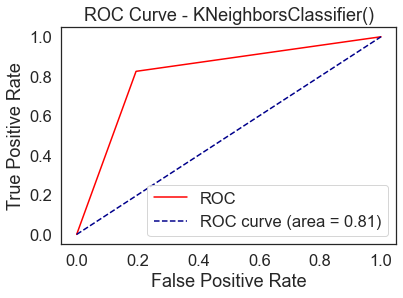


 **************************************************************** 


 **************************************************************** 



In [55]:
for m in models:
    m.fit(X_train, y_train)
    y_pred_m = m.predict(X_test)
    print(f'model: {str(m)}', '\n')
    precision_score = metrics.precision_score(y_test, y_pred_m)
    recall_score = metrics.recall_score(y_test, y_pred_m)
    accuracy_score  = metrics.accuracy_score(y_test,y_pred_m)
    f1_score = metrics.f1_score(y_test,y_pred_m) 
    AUC=roc_auc_score(y_test, y_pred_m)
    evaluation_df.loc[len(evaluation_df.index)] = [m, accuracy_score, precision_score, recall_score, f1_score, AUC ]
    print ("accuracy score", metrics.accuracy_score(y_test, y_pred_m))
    print(classification_report(y_test, y_pred_m))
    print("AUC", roc_auc_score(y_test, y_pred_m))
    Plot_confusion_matrix(y_pred_m, m)
    Plot_roc_curve(y_pred_m, m)
    print('\n','********************************'*2, '\n')
    print('\n','********************************'*2, '\n')

In [56]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score,AUC
0,LogisticRegression(),0.851590,0.859756,0.88125,0.870370,0.847129
1,"(DecisionTreeClassifier(max_features='auto', r...",0.989399,0.981595,1.00000,0.990712,0.987805
2,BernoulliNB(),0.837456,0.860759,0.85000,0.855346,0.835569
3,KNeighborsClassifier(),0.816254,0.846154,0.82500,0.835443,0.814939


### Conclusion:

The maximum accuracy found by using Random forest Clissifier which is 98.9 and minimum is in K-nearest neighbors which is 81.6. The Random forest Clissifier also gives the highest AUC value. Therefore, we can use Random forest for the prediction of heart disease  using this data. 

We may  also use others prediction models and to compare the accuracy and AUC of the model and find the best model for this dataset. The model with higest AUC value will be the best model to predict heart disease. using given dataset.
  
  We can also improve on this accuracy by increasing the sample size or using deep learning algorithms however at the cost of computational expense.

